# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [129]:
import os
!ls $PUIDATA
print("PUIdata", os.getenv("PUIDATA"))
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

201401-citibike-tripdata.csv  201701-citibike-tripdata.zip  saes.csv
201401-citibike-tripdata.zip  gt.csv			    service_request.csv
201501-citibike-tripdata.csv  jl9760.csv		    times_raw.txt
201501-citibike-tripdata.zip  nyc_pluto_18v1.zip	    times.txt
201601-citibike-tripdata.csv  PLUTO_for_WEB
201601-citibike-tripdata.zip  pp.csv
PUIdata /nfshome/jl9760/PUIdata
PUIdata /nfshome/jl9760/PUIdata


In [174]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json




Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [148]:
datestring = '201501'
getCitiBikeCSV(datestring)
datestring_1 = '201508'
getCitiBikeCSV(datestring_1)

file in place, you can continue
file in place, you can continue


In [175]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [176]:
df_1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring_1 + '-citibike-tripdata.csv')
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [178]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
df_1['date'] = pd.to_datetime(df_1['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1,2015-08-01 00:00:04
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2,2015-08-01 00:00:05
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1,2015-08-01 00:00:06
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1,2015-08-01 00:00:09
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1,2015-08-01 00:00:17


In [179]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [180]:
df_1.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [181]:
df = pd.concat([df, df_1])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [182]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
1179039,423,8/31/2015 23:58:43,9/1/2015 00:05:47,3119,Vernon Blvd & 50 Ave,40.742327,-73.954117,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,18686,Subscriber,1988.0,1,2015-08-31 23:58:43
1179040,1021,8/31/2015 23:58:54,9/1/2015 00:15:56,518,E 39 St & 2 Ave,40.747804,-73.973442,348,W Broadway & Spring St,40.724910,-74.001547,23487,Subscriber,1970.0,1,2015-08-31 23:58:54
1179041,1896,8/31/2015 23:59:11,9/1/2015 00:30:47,336,Sullivan St & Washington Sq,40.730477,-73.999061,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,23509,Subscriber,1982.0,1,2015-08-31 23:59:11
1179042,826,8/31/2015 23:59:16,9/1/2015 00:13:02,3075,Division Ave & Marcy Ave,40.707087,-73.957968,364,Lafayette Ave & Classon Ave,40.689004,-73.960239,15405,Customer,NaN,0,2015-08-31 23:59:16
1179043,105,8/31/2015 23:59:41,9/1/2015 00:01:26,476,E 31 St & 3 Ave,40.743943,-73.979661,546,E 30 St & Park Ave S,40.744449,-73.983035,23947,Subscriber,1975.0,1,2015-08-31 23:59:41


# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [183]:
#df is the dataframe where the content of the csv file is stored
df_new = df[['tripduration', 'date']]
df_new.head()

,tripduration,date
0,1346,2015-01-01 00:01:00
1,363,2015-01-01 00:02:00
2,346,2015-01-01 00:04:00
3,182,2015-01-01 00:04:00
4,969,2015-01-01 00:05:00


In [184]:
df_new.tail()

,tripduration,date
1179039,423,2015-08-31 23:58:43
1179040,1021,2015-08-31 23:58:54
1179041,1896,2015-08-31 23:59:11
1179042,826,2015-08-31 23:59:16
1179043,105,2015-08-31 23:59:41


In [185]:
df_new['time'] = df_new['date'].dt.hour
df_new.head()
df_daytime = df_new.loc[(df_new['time'] >= 6) & (df_new['time'] < 16)]
df_nighttime = df_new.loc[df_new['time'] >= 16]
daytime_tripduration = df_daytime['tripduration'].values
nighttime_tripduration = df_nighttime['tripduration'].values

/nfshome/jl9760/.conda/envs/myEnv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


lets run the scipy KS test

In [186]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

**  FILL IN THE CELL BELOW!**

## KS test can tell us if two groups have the same distribution or not. According to the result, the p-value equals 0. The Null Hypothesis is rejected. 






The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

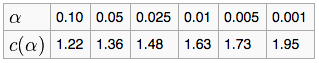

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

## KS Test
## Null Hypothesis: H0: there is no statistical difference in the trip duration distribution of daytime and nighttime riders.

In [187]:

ks_new = scipy.stats.ks_2samp(daytime_tripduration, nighttime_tripduration)
ks_new

Ks_2sampResult(statistic=0.028598256766378227, pvalue=2.725202121917666e-252)

## The p-value is 0, the null hypothesis is rejected. 

## Redo with the reducted data.

In [188]:
df_d_head = df_daytime.head(2500)
df_d_tail = df_daytime.tail(2500)
df_n_head = df_nighttime.head(2500)
df_n_tail = df_nighttime.tail(2500)
df_daytime_short = pd.concat([df_d_head, df_d_tail])
df_nighttime_short = pd.concat([df_n_head, df_n_tail])
daytime_tripduration_short = df_daytime_short['tripduration'].values
nighttime_tripduration_short = df_nighttime_short['tripduration'].values
ks_short = scipy.stats.ks_2samp(daytime_tripduration_short, nighttime_tripduration_short)
ks_short

Ks_2sampResult(statistic=0.04039999999999999, pvalue=0.0005489014968410555)

## With the smaller size sample, the p-value increases. However, it still smaller than 0.05. The Null Hypothesis is still rejected.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



## Null Hypothesis: There is no correlation in the trip duration distribution between daytime and nighttime riders.

In [196]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
np.random.seed(999)
daytime_tripduration_new = np.sort(np.random.choice(daytime_tripduration, size=20000))
nighttime_tripduration_new = np.sort(np.random.choice(nighttime_tripduration, size=20000))

scipy.stats.pearsonr(daytime_tripduration_new, nighttime_tripduration_new)

(0.8967684082548141, 0.0)

## The p-value is 0, the null hypothesis is rejected. The coefficient is 0.89, which means there is a fairly strong correlation in trip duration distribution between daytime and nighttime riders.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [197]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
spearman = scipy.stats.spearmanr(nighttime_tripduration_new, nighttime_tripduration_new)
spearman

SpearmanrResult(correlation=1.0, pvalue=0.0)

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

## The p-value is 0, the null hypothesis is rejected. The coefficient is 1, which means there is a strong correlation in trip duration distribution between daytime and nighttime riders.

# The Extra Credit